Author : Komal Anil Patil

GRIP January 2022 - Sparks Foundation

Task 1 - Predict using supervised ML(Linear Regression)


Predict the percentage of an student based on the no. of study hours.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
score_data.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [3]:
#Shape of data
score_data.shape

(25, 2)

In [4]:
#list of features
score_data.columns


Index(['Hours', 'Scores'], dtype='object')

In [6]:
#information of dataset
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
score_data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [8]:
score_data.isnull()

Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False

In [9]:
score_data.corr()

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

<AxesSubplot:>

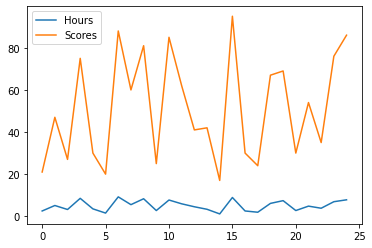

In [10]:
#Simple line graph
score_data.plot()

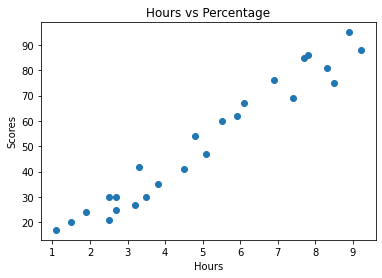

In [11]:
plt.scatter(score_data['Hours'],score_data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


In [12]:
x = score_data[['Hours']]
y = score_data.drop('Hours',axis = 1)

In [13]:
#Training and testing dataset(80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [14]:
x_train.shape,x_test.shape

((20, 1), (5, 1))

In [15]:
#importing linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

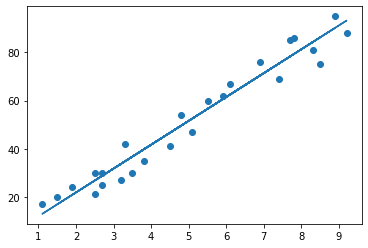

In [16]:
#Plotting regression line
line = model.coef_*x+model.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [17]:
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

In [18]:
acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)

In [19]:
#Calculating mean Squared error
from sklearn.metrics import mean_squared_error

rms_train = np.sqrt(mean_squared_error(y_train,y_train_prediction))
rms_test = np.sqrt(mean_squared_error(y_test,y_test_prediction))

In [20]:
print("Linear Regression Model : ") 
print("\nAccuracy of training dataset ", acc_train)
print("\nAccuracy of testing dataset ", acc_test)
print("\nRMSE of training dataset ", rms_train)
print("\nRMSE of testing dataset ", rms_test)

Linear Regression Model : 

Accuracy of training dataset  0.9515510725211552

Accuracy of testing dataset  0.9454906892105356

RMSE of training dataset  5.558613350226342

RMSE of testing dataset  4.6474476121003665


In [21]:
predicted = y_test_prediction[:,0]
actual = np.array(y_test['Scores'])
df_dict = {"Actual" : actual,"predicted" : predicted}
df = pd.DataFrame(df_dict)
df.head()

Actual  predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

Text(0.5, 1.0, 'Training data - Hours vs Score')

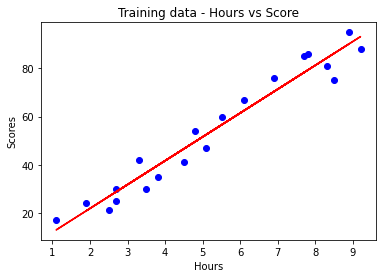

In [22]:
plt.scatter(x_train,y_train,color = "blue")
plt.plot(x_train,y_train_prediction,color = "red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Training data - Hours vs Score")

Text(0.5, 1.0, 'Testing data - Hours vs Score')

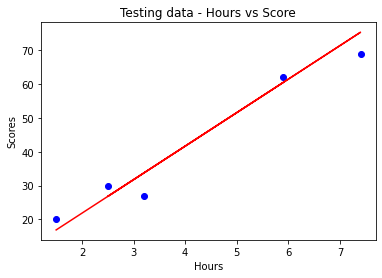

In [23]:
plt.scatter(x_test,y_test,color = "blue")
plt.plot(x_test,y_test_prediction,color = "red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Testing data - Hours vs Score")

In [25]:
output = model.predict([[9.25]])
print(f"The Score of student is {output[0][0]} if he studies for 9.25 hrs/day ")

The Score of student is 93.69173248737538 if he studies for 9.25 hrs/day 


In [27]:
from sklearn import metrics
print('mean absolute error: ',metrics.mean_absolute_error(y_test,y_test_prediction))

mean absolute error:  4.183859899002975
